# Characterization of Discrete Systems in the Spectral Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Magnitude and Phase

The discrete-time Fourier domain transfer function $H(e^{j \Omega})$ characterizes the transmission properties of a linear time-incariant (LTI) system with respect to an [harmonic exponential signal](../discrete_signals/standard_signals.ipynb#Complex-Exponential-Signal) $e^{j \Omega k}$ with normalized frequency $\Omega$. In order to investigate the characteristics of an LTI system, often the magnitude $| H(e^{j \Omega}) |$ and phase $\varphi_H(e^{j \Omega})$ of the transfer function is regarded separately. Decomposing the output signal $Y(e^{j \Omega}) = X(e^{j \Omega}) \cdot H(e^{j \Omega})$ into its magnitude $| Y(e^{j \Omega}) |$ and phase $\varphi_Y(e^{j \Omega})$ yields

\begin{align}
| Y(e^{j \Omega}) | &= | X(e^{j \Omega}) | \cdot | H(e^{j \Omega}) | \\
\varphi_Y(e^{j \Omega}) &= \varphi_X(e^{j \Omega}) + \varphi_H(e^{j \Omega})
\end{align}

where $X(e^{j \Omega})$ denotes the input signal, and $| X(e^{j \Omega}) |$ and $\varphi_X(e^{j \Omega})$ its magnitude and phase, respectively. It can be concluded, that the magnitude $| H(e^{j \Omega}) |$ quantifies the frequency-dependent attenuation of the magnitude $| X(e^{j \Omega}) |$ of the input signal by the system, while $\varphi_H(e^{j \Omega})$ quantifies the introduced phase-shift. 

A rational transfer function $H(z)$ which is composed from polynomials in $z^{-1}$ can be expressed [in terms of its poles and zeros](../z_transform/definition.ipynb#Representation). Applying this representation to the transfer function $H(e^{j \Omega})$ in the discrete-time Fourier domain yields

\begin{equation}
H(e^{j \Omega}) = K \cdot \frac{\prod_{\mu=0}^{Q} (e^{j \Omega} - z_{0 \mu})}{\prod_{\nu=0}^{P} (e^{j \Omega} - z_{\infty \nu})}
\end{equation}

where $z_{0 \mu}$ and $z_{\infty \nu}$ denote the $\mu$-th zero and $\nu$-th pole of $H(z)$, and $Q$ and $P$ the total number of zeros and poles, respectively. Often the logarithmic magnitude of the transfer function $20 \log_{10} | H(e^{j \Omega}) |$ in [decibels](https://en.wikipedia.org/wiki/Decibel) (dB) is considered. The representation of amplitudes in dB is beneficial due to its clear coverage of wide amplitude ranges and convenient calculus for scaled amplitudes. Using the representation of the transfer function with respect to its poles and zeros yields for the logarithm of the magnitude and the phase

\begin{align}
\log_{10} | H(e^{j \Omega}) | &= \sum_{\mu=0}^{Q} \log_{10} |e^{j \Omega} - z_{0 \mu}| - \sum_{\nu=0}^{P} \log_{10} |e^{j \Omega} - z_{\infty \nu}| + \log_{10} |K|   \\
\varphi_H(e^{j \Omega}) &= \sum_{\mu=0}^{Q} \arg (e^{j \Omega} - z_{0 \mu}) - \sum_{\nu=0}^{P} \arg (e^{j \Omega} - z_{\infty \nu})
\end{align}

where $\arg(\cdot)$ denotes the [argument](https://en.wikipedia.org/wiki/Argument_%28complex_analysis%29) (phase) of a complex function. It can be concluded, that the individual contributions of the poles and zeros to the logarithm of the magnitude and phase can be superimposed. This fact may be exploited to estimate the frequency and phase response of discrete systems by considering the influence of individual poles and zeros. This is discussed in the following for a system composed from one pole and zero ($P=Q=0$).

![Influence of individual poles and zeros on the magnitude and phase response of a discrete system.](influence_pole_zero.png)

The magnitude of the transfer function depends on the ratio of Euclidean distances from the pole and zero to the position $e^{j \Omega}$ on the unit circle $|z| = 1$. Small distances, e.g. a pole or zero close to the unit circle, lead to large negative values of the individual summands in the logarithmic magnitude response, e.g. $\log_{10} |e^{j \Omega} - z_{0 \mu}|$. This holds especially for normalized frequencies $\Omega$ in the proximity of the pole/zero. It can be concluded that

* a pole close to the unit circle results in a resonance (e.g. maximum), and
* a zero close to the unit circle results in a notch/anti-resonance (e.g. minimum)

in the magnitude response. The normalized frequency $\Omega$ of this maximum/minimum is given by the argument of the pole $z_{\infty \mu}$ and zero $z_{0 \mu}$, respectively.

**Example - Second order system**

The magnitude response of a real-valued second-order LTI system with the transfer function

\begin{equation}
H(e^{j \Omega}) = \frac{(e^{j \Omega} - z_0)(e^{j \Omega} - z_0^*)}{(e^{j \Omega} - z_\infty)(e^{j \Omega} - z_\infty^*)}
\end{equation}

is considered. It is convenient to represent the pole/zero by its magnitude and phase in order to illustrate its location relative to the unit circle

\begin{align}
z_0 &= r_0 + e^{j \Omega_0}  &\text{with } \quad &r_0 = 0.8 & \Omega_0 = \frac{\pi}{2} \\
z_\infty  &= r_\infty + e^{j \Omega_\infty} & &r_\infty = 0.95 & \Omega_\infty = \frac{\pi}{4}
\end{align}

where for instance $r_0 = |z_0|$ and $\Omega_0 = \arg \{ z_0 \}$. First the contribution of the pair of complex conjugate zeros $z_0$ and $z_0^*$ to the logarithmic magnitude of the transfer function $H(e^{j \Omega})$ is computed and plotted over the normalized frequency $\Omega$.

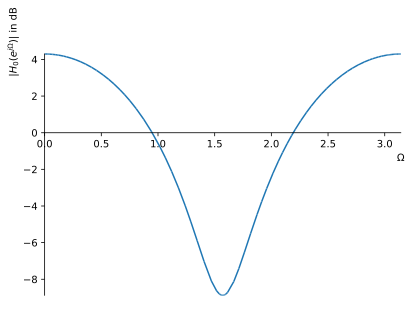

In [1]:
import sympy as sym
%matplotlib inline
sym.init_printing()


def db(x):
    'compute dB value'
    return 20 * sym.log(sym.Abs(x), 10)


W = sym.symbols('Omega', real=True)
z_0 = 0.8 * sym.exp(sym.I * sym.pi/2)

H1 = (sym.exp(sym.I * W) - z_0)*(sym.exp(sym.I * W) - sym.conjugate(z_0))
Hlog1 = db(H1)
sym.plot(Hlog1, (W, 0, sym.pi), xlabel='$\Omega$',
         ylabel='$|H_0(e^{j \Omega})|$ in dB')

Now the contribution of the pair of complex conjugate poles $z_\infty$ and $z_\infty^*$ is computed and plotted

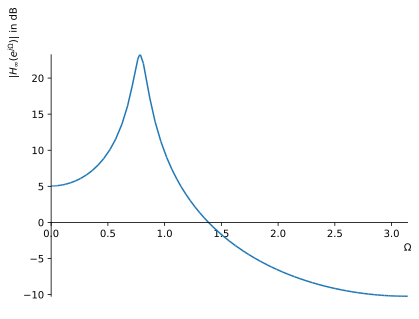

In [2]:
z_inf = 0.95 * sym.exp(sym.I * sym.pi/4)

H2 = 1/((sym.exp(sym.I * W) - z_inf)*(sym.exp(sym.I * W) - sym.conjugate(z_inf)))
Hlog2 = db(H2)
sym.plot(Hlog2, (W, 0, sym.pi), xlabel='$\Omega$',
         ylabel='$|H_\infty(e^{j \Omega})|$ in dB')

The logarithmic magnitude response of the system is given by superposition of the individual contributions from the zeros and the poles

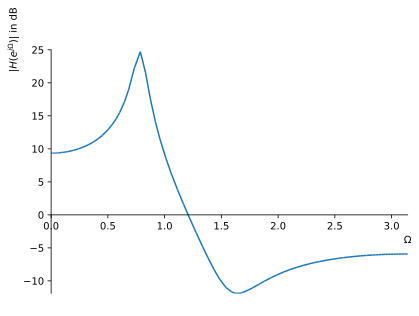

In [3]:
Hlog = Hlog1 + Hlog2
sym.plot(Hlog, (W, 0, sym.pi), xlabel='$\Omega$',
         ylabel='$|H(e^{j \Omega})|$ in dB')

**Exercise**

* Why is the system real valued?
* Examine the magnitude response of the system. How is it related to the magnitude responses of the individual zero/pole?
* Move the pole and/or zero closer to the unit circle by changing the values $r_\infty$ and/or $r_0$. What is the influence on the magnitude response?
* Change the phase of the pole and/or zero by changing the values $\Omega_\infty$ and/or $\Omega_0$. What is the influence on the magnitude response?

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.